## Poultry Farming Business Development.

This project is developed using the CRISP-DM methology consisting of :
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation and
6. Data Presentation.


### Business Problem Understanding:
Poultry meat are these days the easiest sources to get high quality proteins, minerals and vitamins to balance the human diet. 
Specially developed breeds both broiler and layer are now available with an ability of quick grown and high feed conversion efficiency.

The Indian Poultry Industry is the 2nd largest in the market, especially the broiler industry segment growing at 8-12% every year. Depending on the farm size poultry farming can be main source of family income or can provide subsidiary income and gainful employment to farmers throughout the years.


But to make poultry farming efficient and more profitable the industries want to have automated monitoring system to get idea on the risks involved in the business. The mortality and feeding process increase the risk in poultry industry to very high level.

This project will allow this business with some best models to go ahead to achieve better results.

In [287]:
# import important functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [288]:
# Load data
data = pd.read_csv('Poultry_Data.csv')
data.head()

,Sale ID,Gender,Age (months),Vaccine status,Weight(kg),Death Rate(%),Sale (in lakhs),Profit (%),Risk (%),Collection_Amount (in lakhs),Reload_History (per month),Sale_Area,Next load_Status
0,SL001086,Male Bird,5,Yes,5.00,12.0,98.00,90,100,14.80,1,Urban,N
1,SL001087,Female Bird,4,Yes,0.25,15.0,2.75,86,100,2.63,1,Semiurban,Y
2,SL001091,Male Bird,1,Yes,0.25,15.9,2.75,86,100,2.63,1,Urban,N
3,SL001095,Male Bird,0,Yes,0.25,15.0,2.75,86,100,2.63,1,Urban,N
4,SL001002,Female Bird,3,Yes,0.58,15.0,2.75,90,100,2.63,1,Urban,Y


In [289]:
# check data size and column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sale ID                       615 non-null    object 
 1   Gender                        615 non-null    object 
 2   Age (months)                  615 non-null    object 
 3   Vaccine status                615 non-null    object 
 4   Weight(kg)                    615 non-null    float64
 5   Death Rate(%)                 615 non-null    float64
 6   Sale (in lakhs)               615 non-null    float64
 7   Profit (%)                    615 non-null    int64  
 8   Risk (%)                      615 non-null    int64  
 9   Collection_Amount (in lakhs)  615 non-null    float64
 10  Reload_History (per month)    615 non-null    int64  
 11  Sale_Area                     615 non-null    object 
 12  Next load_Status              615 non-null    object 
dtypes: fl

In [290]:
# Check column names in the dataset
data.columns

Index(['Sale ID ', 'Gender', 'Age (months)', 'Vaccine status', 'Weight(kg)',
       'Death Rate(%) ', 'Sale (in lakhs)', 'Profit (%)', 'Risk (%)',
       'Collection_Amount (in lakhs)', 'Reload_History (per month)',
       'Sale_Area', 'Next load_Status'],
      dtype='object')

### Data Understanding:
* Sale ID : Unique Sale ID
* Gender: Male/Female
* Age (months): Age of the Birds
* Vaccine status: Birds vaccinated status
* Weight(kg): Birds weight
* Death Rate (%): Birds Mortality Rate
* Sale (in lakhs): Birds sale percent
* Profit (%):Profit gained from the Birds
* Risk (%):Risk involved in bringing up the birds
* Collection_Amount (in lakhs): Amount made from the Birds
* Reload_History (per month): Birds re- purchased history
* Sale_Area: Rural/Semi-Urban/urban
* Next load_Status: Birds plan to reload in next batches status(N/Y).


In [291]:
# Check the toatl unique sale ids
data['Sale ID '].nunique()

615

In [292]:
# dropping the unique sale ids
data.drop(columns=['Sale ID '],inplace=True)

In [293]:
data.columns

Index(['Gender', 'Age (months)', 'Vaccine status', 'Weight(kg)',
       'Death Rate(%) ', 'Sale (in lakhs)', 'Profit (%)', 'Risk (%)',
       'Collection_Amount (in lakhs)', 'Reload_History (per month)',
       'Sale_Area', 'Next load_Status'],
      dtype='object')

In [294]:
# Check the gender types
data['Gender'].unique()

array(['Male Bird', 'Female Bird'], dtype=object)

In [295]:
# Check the count of each gender types -
data['Gender'].value_counts()

Gender
Male Bird      487
Female Bird    128
Name: count, dtype: int64

In [296]:
# Check the age of the birds
data['Age (months)'].unique()

array(['5', '4', '1', '0', '3', '12', '4+', '2', '11', '10', '9', '6',
       '7', '8', '14'], dtype=object)

In [297]:
#check the counts based on the ages 
data['Age (months)'].value_counts()

Age (months)
0     149
1     109
4      64
3      46
7      44
8      44
2      41
5      37
9      37
6      22
11     13
10      4
4+      3
12      1
14      1
Name: count, dtype: int64

In [298]:
data['Vaccine status'].unique()

array(['Yes', 'No'], dtype=object)

In [299]:
data['Vaccine status'].value_counts()

Vaccine status
Yes    391
No     224
Name: count, dtype: int64

In [300]:
data['Weight(kg)'].unique()

array([5.   , 0.25 , 0.58 , 4.56 , 0.35 , 0.3  , 0.23 , 0.26 , 1.25 ,
       0.28 , 3.65 , 1.53 , 6.   , 9.   , 2.   , 0.98 , 0.965, 1.65 ,
       1.9  , 0.21 , 4.   , 1.96 , 2.3  , 6.25 , 8.96 , 3.36 , 2.39 ,
       1.12 , 0.78 , 1.99 , 0.287, 1.897, 0.214, 3.89 , 2.2  , 0.32 ,
       1.98 ])

In [301]:
data['Weight(kg)'].value_counts()

Weight(kg)
0.214    103
0.780     76
0.210     51
0.287     50
8.960     34
9.000     28
3.360     25
1.990     24
1.897     21
5.000     20
0.250     18
2.200     15
0.980     13
0.320     13
2.390     12
3.890     11
0.350     11
0.965     10
3.650     10
0.280      9
1.900      8
1.530      8
0.580      7
4.560      6
1.980      6
2.300      5
1.250      5
2.000      4
1.120      4
1.960      1
6.250      1
4.000      1
1.650      1
6.000      1
0.260      1
0.230      1
0.300      1
Name: count, dtype: int64

In [302]:
data['Death Rate(%) '].unique()

array([12.  , 15.  , 15.9 ,  2.  ,  2.56,  6.  , 10.  ])

In [303]:
data['Death Rate(%) '].value_counts()

Death Rate(%) 
15.00    347
12.00    166
6.00      85
2.00      14
15.90      1
2.56       1
10.00      1
Name: count, dtype: int64

In [304]:
data['Sale (in lakhs)'].unique()

array([98.  ,  2.75, 69.  , 93.  , 89.  ])

In [305]:
data['Sale (in lakhs)'].value_counts()

Sale (in lakhs)
2.75     348
98.00    210
93.00     41
69.00     15
89.00      1
Name: count, dtype: int64

In [306]:
data['Collection_Amount (in lakhs)'].unique()

array([14.8 ,  2.63,  4.8 ,  2.35,  0.85])

In [307]:
data['Collection_Amount (in lakhs)'].value_counts()

Collection_Amount (in lakhs)
2.63     367
4.80     217
2.35      25
0.85       5
14.80      1
Name: count, dtype: int64

In [308]:
data['Reload_History (per month)'].unique()

array([1, 0], dtype=int64)

In [309]:
data['Reload_History (per month)'].value_counts()

Reload_History (per month)
1    526
0     89
Name: count, dtype: int64

In [310]:
data['Sale_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [311]:
data['Sale_Area'].value_counts()

Sale_Area
Semiurban    233
Urban        203
Rural        179
Name: count, dtype: int64

In [312]:
data['Next load_Status'].unique()

array(['N', 'Y'], dtype=object)

In [313]:
data['Next load_Status'].value_counts()

Next load_Status
Y    424
N    191
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [314]:
continous = ['Death Rate(%) ', 'Sale (in lakhs)','Profit (%)','Risk (%)','Collection_Amount (in lakhs)']

In [315]:
continous = ['Death Rate(%) ', 'Sale (in lakhs)','Profit (%)','Risk (%)','Collection_Amount (in lakhs)']
discrete_categorical = ['Gender','Age (months)','Vaccine status','Sale_Area','Reload_History (per month)','Next load_Status']
discrete_count = ['Weight(kg)','Reload_History (per month)']

In [316]:
data[continous].describe()

,Death Rate(%),Sale (in lakhs),Profit (%),Risk (%),Collection_Amount (in lakhs)
count,615.000000,615.000000,615.000000,615.000000,615.000000
mean,12.623512,43.047154,109.409756,181.952846,3.389610
std,3.483846,46.257078,40.650948,106.377697,1.164683
min,2.000000,2.750000,86.000000,48.000000,0.850000
25%,12.000000,2.750000,86.000000,95.500000,2.630000
50%,15.000000,2.750000,90.000000,100.000000,2.630000
75%,15.000000,98.000000,90.000000,300.000000,4.800000
max,15.900000,98.000000,250.000000,300.000000,14.800000


<Axes: xlabel='Collection_Amount (in lakhs)', ylabel='Count'>

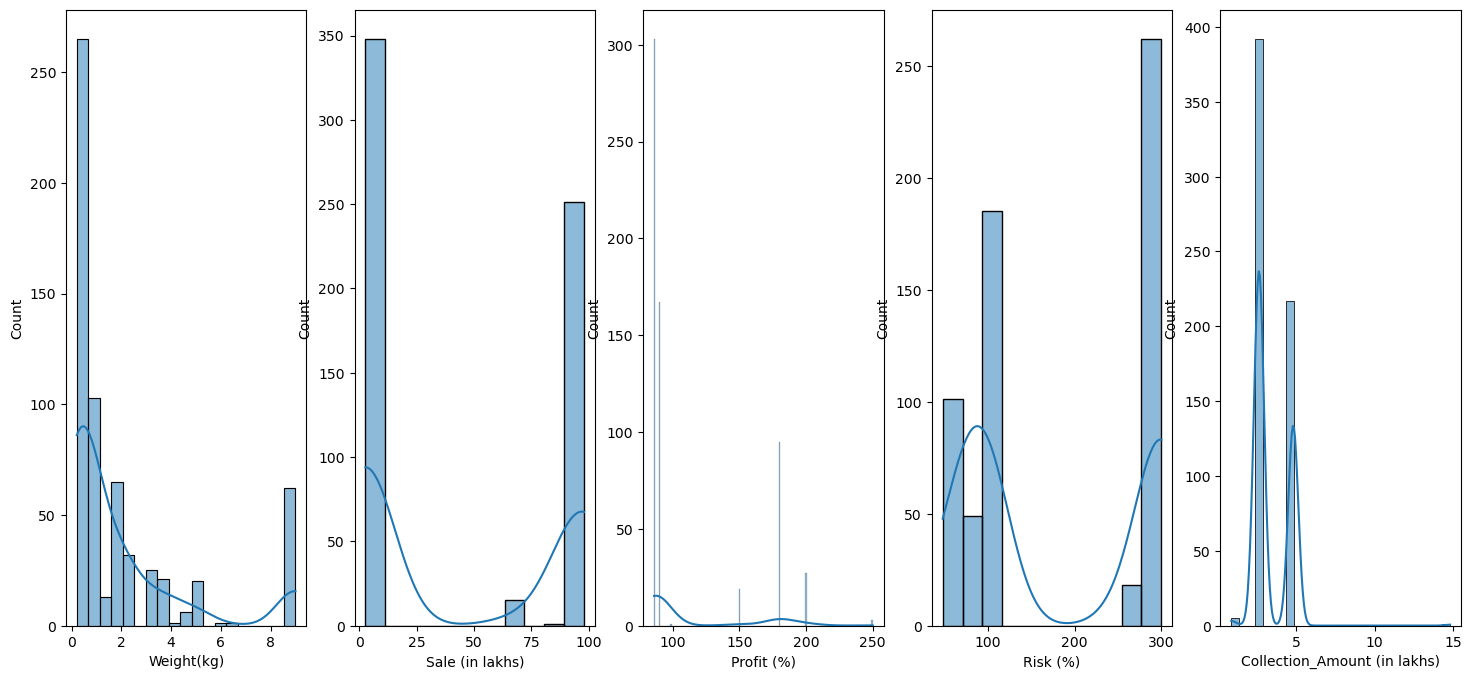

In [317]:
# Histograms with KDE curves
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,5,1)
sns.histplot(data['Weight(kg)'],kde=True)

plt.subplot(1,5,2)
sns.histplot(data['Sale (in lakhs)'],kde=True)

plt.subplot(1,5,3)
sns.histplot(data['Profit (%)'],kde=True)

plt.subplot(1,5,4)
sns.histplot(data['Risk (%)'],kde=True)

plt.subplot(1,5,5)
sns.histplot(data['Collection_Amount (in lakhs)'],kde=True)


In [318]:
data[continous].skew()

Death Rate(%)                  -1.463392
Sale (in lakhs)                 0.289672
Profit (%)                      1.410468
Risk (%)                        0.149283
Collection_Amount (in lakhs)    1.886005
dtype: float64

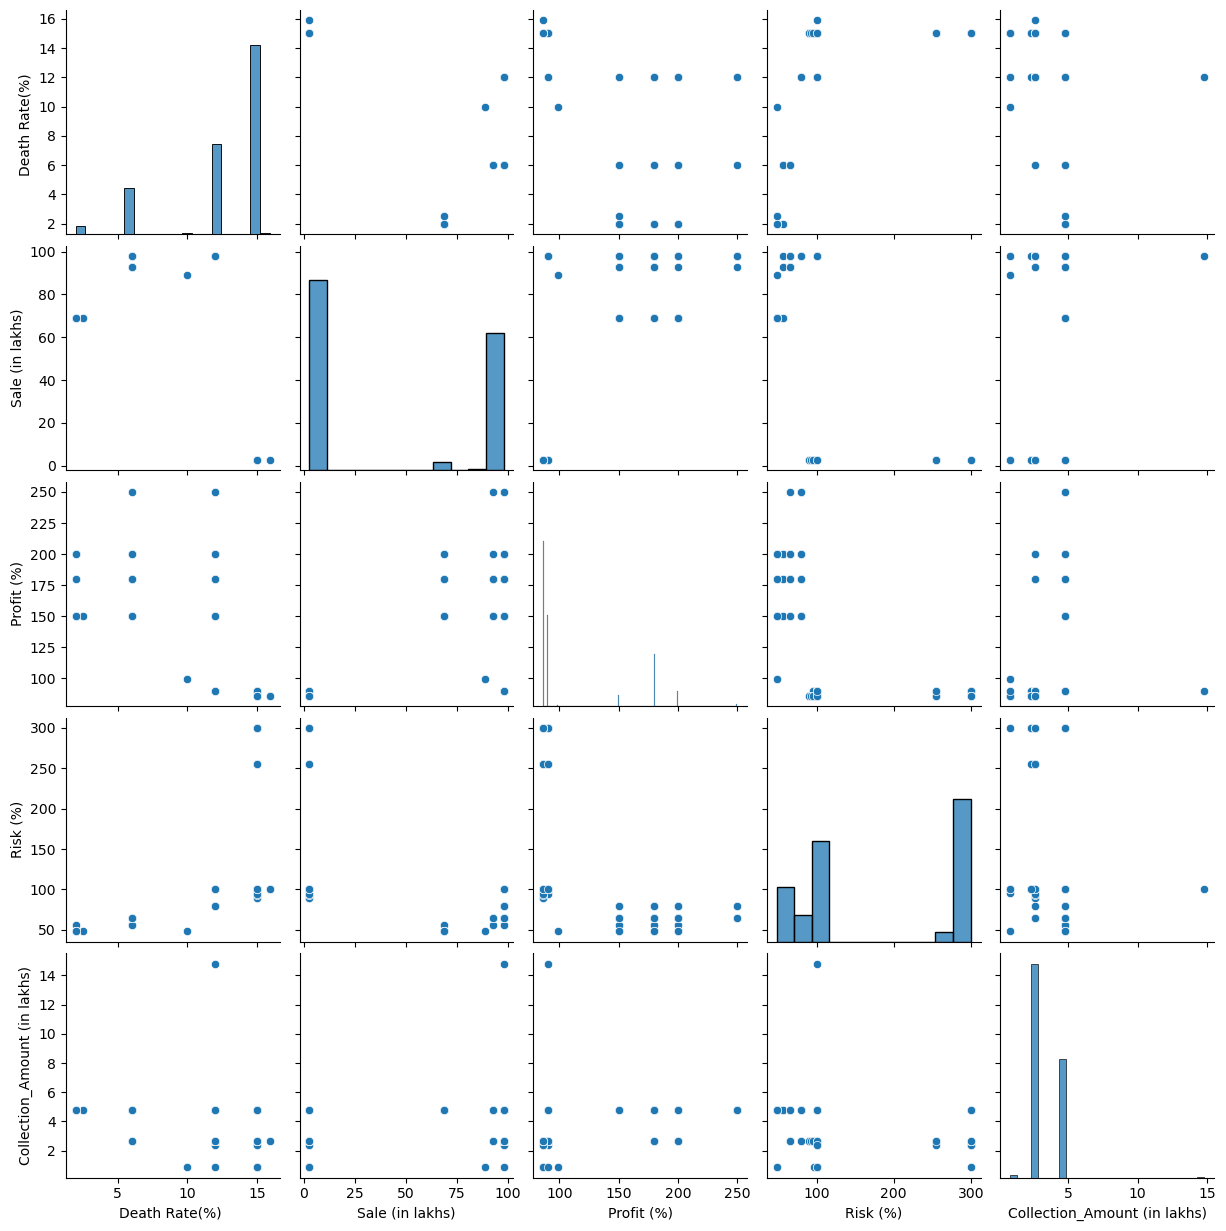

In [319]:
sns.pairplot(data[continous])
plt.show()

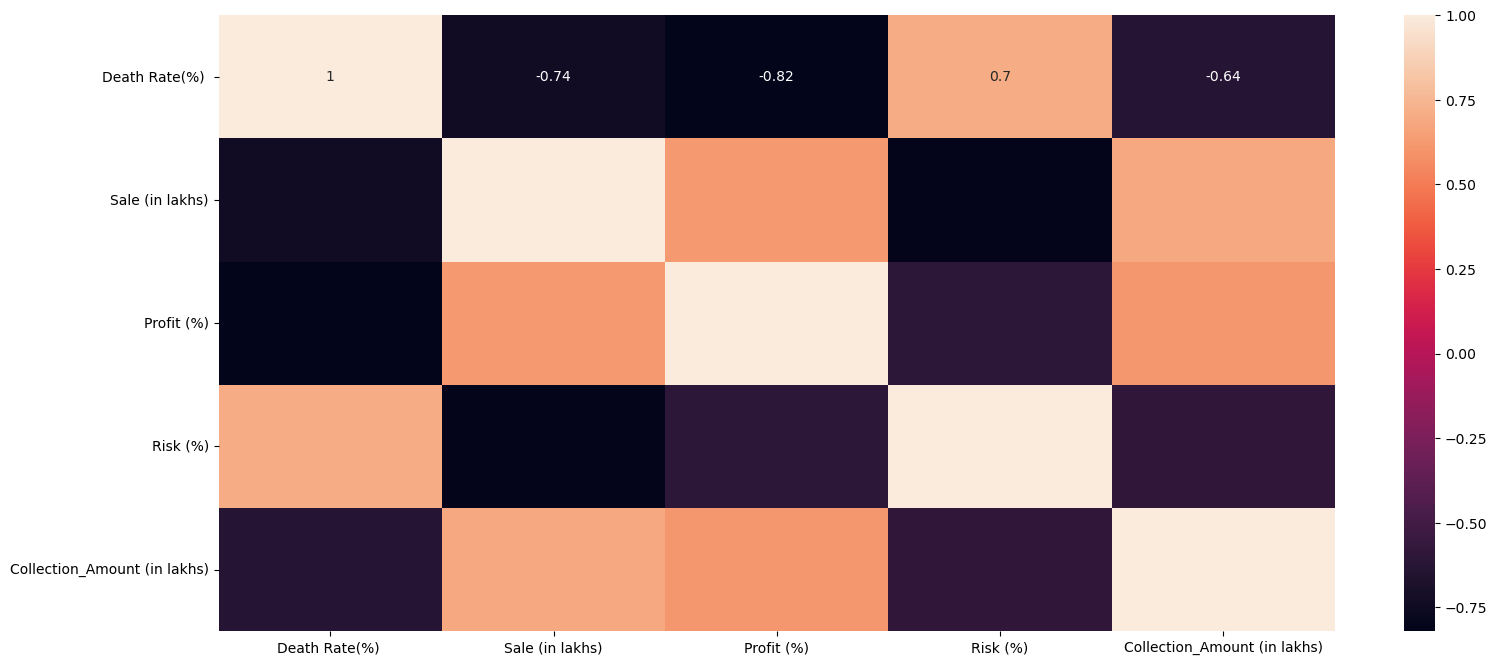

In [320]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

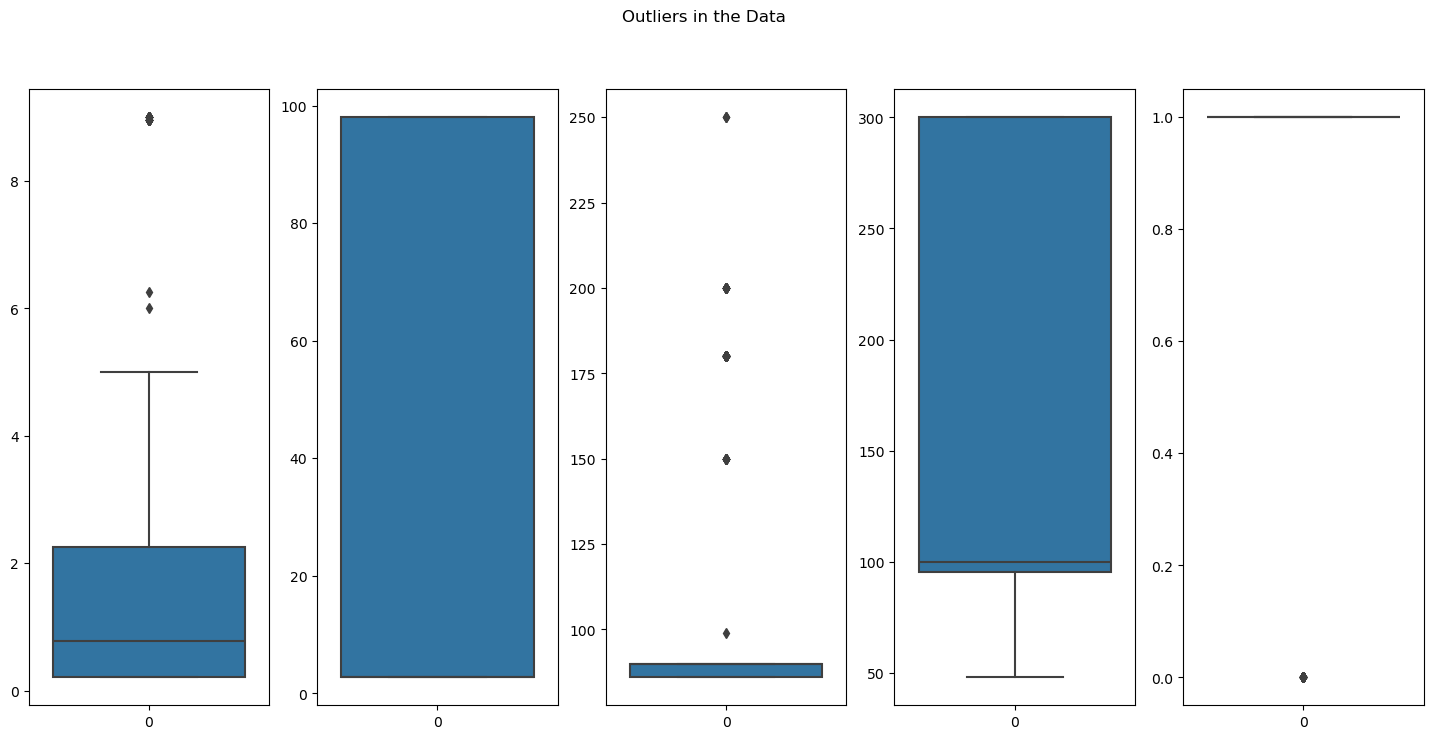

In [321]:
# Visualize the outliers using Box Plot

plt.subplot(1,5,1)
sns.boxplot(data['Weight(kg)'])

plt.subplot(1,5,2)
sns.boxplot(data['Sale (in lakhs)'])

plt.subplot(1,5,3)
sns.boxplot(data['Profit (%)'])

plt.subplot(1,5,4)
sns.boxplot(data['Risk (%)'])

plt.subplot(1,5,5)
sns.boxplot(data['Reload_History (per month)'])

plt.suptitle('Outliers in the Data')
plt.show()


### for Discrete Variables 

In [322]:
# column analysis
continous = ['Weight(kg)','Sale (%)','Profit (%)','Risk (%)','Collection_Amount (in lakhs)']
discrete_categorical = ['Gender','Age (months)','Vaccine status','Sale_Area','Next load_Status']


In [323]:
data[discrete_categorical].describe()

,Gender,Age (months),Vaccine status,Sale_Area,Next load_Status
count,615,615,615,615,615
unique,2,15,2,3,2
top,Male Bird,0,Yes,Semiurban,Y
freq,487,149,391,233,424


<Axes: >

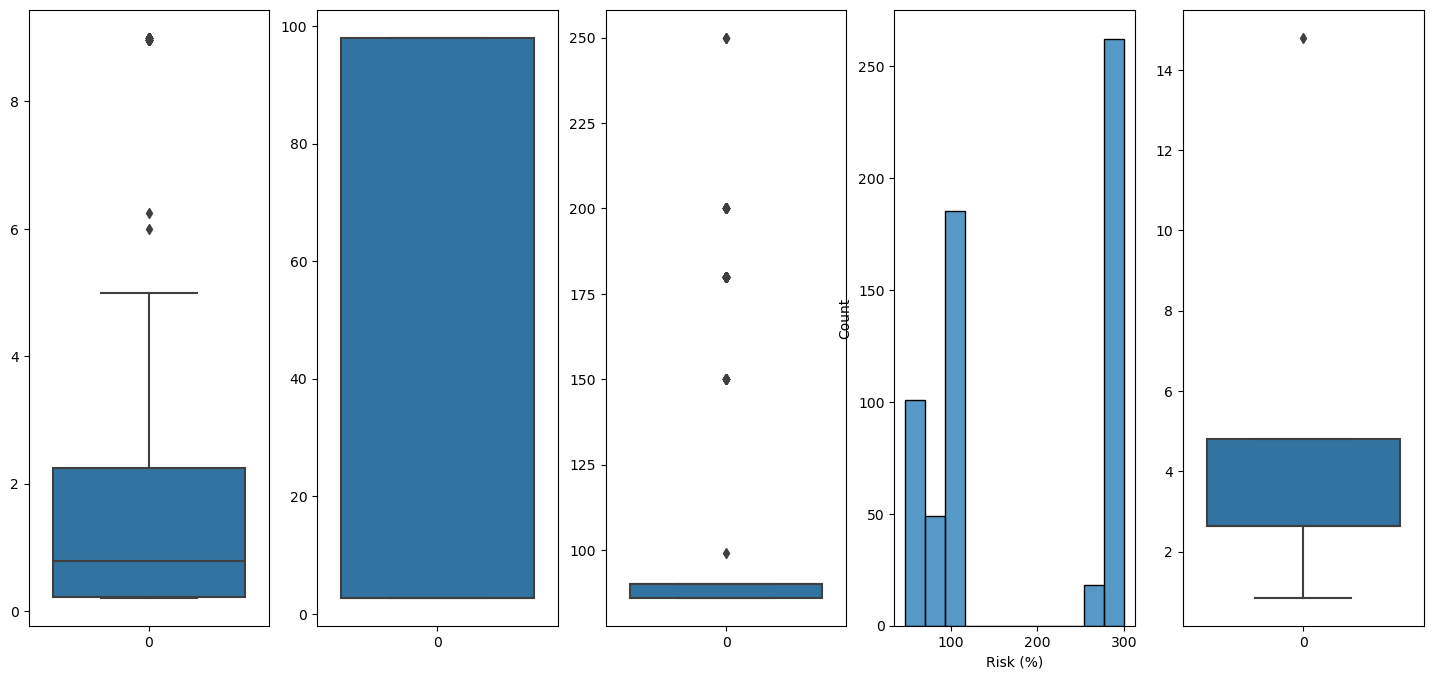

In [324]:
# Visualize the outliers using Box Plot
plt.subplot(1,5,1)
sns.boxplot(data['Weight(kg)'])

plt.subplot(1,5,2)
sns.boxplot(data['Sale (in lakhs)'])

plt.subplot(1,5,3)
sns.boxplot(data['Profit (%)'])

plt.subplot(1,5,4)
sns.histplot(data['Risk (%)'])

plt.subplot(1,5,5)
sns.boxplot(data['Collection_Amount (in lakhs)'])


## Data Preparation:

##### Modifying the wrong data 

In [325]:
data['Age (months)'].unique()

array(['5', '4', '1', '0', '3', '12', '4+', '2', '11', '10', '9', '6',
       '7', '8', '14'], dtype=object)

In [326]:
# converting the 4+ to 4 - as per observing the dataset.
data['Age (months)'] = data['Age (months)'].replace(['4+'],'4')

In [327]:
data['Age (months)'].unique()

array(['5', '4', '1', '0', '3', '12', '2', '11', '10', '9', '6', '7', '8',
       '14'], dtype=object)

### Missing Values Treatment

In [328]:
# Check number of missing values
data.isnull().sum()

Gender                          0
Age (months)                    0
Vaccine status                  0
Weight(kg)                      0
Death Rate(%)                   0
Sale (in lakhs)                 0
Profit (%)                      0
Risk (%)                        0
Collection_Amount (in lakhs)    0
Reload_History (per month)      0
Sale_Area                       0
Next load_Status                0
dtype: int64

In [329]:
# check percentage of missing values
data.isnull().sum()/len(data)*100

Gender                          0.0
Age (months)                    0.0
Vaccine status                  0.0
Weight(kg)                      0.0
Death Rate(%)                   0.0
Sale (in lakhs)                 0.0
Profit (%)                      0.0
Risk (%)                        0.0
Collection_Amount (in lakhs)    0.0
Reload_History (per month)      0.0
Sale_Area                       0.0
Next load_Status                0.0
dtype: float64

In [330]:
# to make sure thee columns donot have any missing values and donot replace but drop (from the business problem)
data = data.dropna(subset=['Weight(kg)','Sale (in lakhs)','Reload_History (per month)','Collection_Amount (in lakhs)','Next load_Status'])

In [331]:
data.isnull().sum()

Gender                          0
Age (months)                    0
Vaccine status                  0
Weight(kg)                      0
Death Rate(%)                   0
Sale (in lakhs)                 0
Profit (%)                      0
Risk (%)                        0
Collection_Amount (in lakhs)    0
Reload_History (per month)      0
Sale_Area                       0
Next load_Status                0
dtype: int64

### treating Outliers
Encoding

In [332]:
data['Gender'] = data['Gender'].map({'Male Bird':1,'Female Bird':0}).astype('int')

In [334]:
data['Vaccine status'] = data['Vaccine status'].map({'Yes':1,'No':0}).astype('int')

In [335]:
data['Sale_Area'] = data['Sale_Area'].map({'Semiurban':0,'Urban':1,'Rural':2}).astype('int')

In [336]:
data['Next load_Status'] = data['Next load_Status'].map({'N':0,'Y':1}).astype('int')

### Data conversion

In [337]:
data['Weight(kg)'] = data['Weight(kg)'].astype('int')

In [344]:
data['Sale (in lakhs)'] = data['Sale (in lakhs)'].astype('int')

In [345]:
data['Age (months)'] = data['Age (months)'].astype('int')

In [346]:
data['Collection_Amount (in lakhs)'] = data['Collection_Amount (in lakhs)'].astype('int')

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        615 non-null    int32  
 1   Age (months)                  615 non-null    int32  
 2   Vaccine status                615 non-null    int32  
 3   Weight(kg)                    615 non-null    int32  
 4   Death Rate(%)                 615 non-null    float64
 5   Sale (in lakhs)               615 non-null    int32  
 6   Profit (%)                    615 non-null    int64  
 7   Risk (%)                      615 non-null    int64  
 8   Collection_Amount (in lakhs)  615 non-null    int32  
 9   Reload_History (per month)    615 non-null    int64  
 10  Sale_Area                     615 non-null    int32  
 11  Next load_Status              615 non-null    int32  
 12  Sale (%)                      615 non-null    int32  
dtypes: fl

### Transformation

In [348]:
data[['Weight(kg)','Profit (%)']].skew()   # no skewness

Weight(kg)    1.822597
Profit (%)    1.410468
dtype: float64

In [349]:
data

,Gender,Age (months),Vaccine status,Weight(kg),Death Rate(%),Sale (in lakhs),Profit (%),Risk (%),Collection_Amount (in lakhs),Reload_History (per month),Sale_Area,Next load_Status,Sale (%)
0,1,5,1,5,12.0,98,90,100,14,1,1,0,98
1,0,4,1,0,15.0,2,86,100,2,1,0,1,2
2,1,1,1,0,15.9,2,86,100,2,1,1,0,2
3,1,0,1,0,15.0,2,86,100,2,1,1,0,2
4,0,3,1,0,15.0,2,90,100,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,2,0,0,15.0,2,86,300,2,1,0,1,2
611,1,2,0,0,15.0,2,86,300,2,1,2,1,2
612,1,2,0,0,15.0,2,86,300,2,1,2,1,2
613,0,5,0,1,12.0,98,90,100,4,1,2,1,98


### X & y

In [350]:
X = data.drop('Next load_Status',axis=1)
y = data['Next load_Status']

### Identify the best random state number

In [352]:
Train = []
Test  = []
CV = []

for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    log_default = LogisticRegression()
    log_default.fit(X_train,y_train)

    ypred_train = log_default.predict(X_train)
    ypred_test  = log_default.predict(X_test)

    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default, X_train, y_train, cv=5,scoring="accuracy").mean())

em = pd.DataFrame({"Train":Train, "Test":Test, "CV":CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("best random_state number:",rs)

best random_state number: 65


### train-test split

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rs)

### Machine Learning Modelling & Evaluation

### 1. Logistic Regression

In [435]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train = log_model.predict(X_train)
ypred_test  = log_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross validation score :", cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8252032520325203
Cross validation score : 0.8231704803133374
Test Accuracy : 0.7804878048780488


### 2. KNN

In [436]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator, param_grid, scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test  = knn_model.predict(X_test)

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("Cross validation score :", cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.7926829268292683
Cross validation score : 0.75007215007215
Test Accuracy : 0.6422764227642277


In [358]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

### 3. Support Vector Machine (SVM)

In [438]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test  = svm_model.predict(X_test)

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("Cross validation score :", cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8211382113821138
Cross validation score : 0.8211502782931355
Test Accuracy : 0.7723577235772358


In [369]:
svm_grid.best_estimator_

### 4. Decision Tree Classifier

In [404]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],
              "max_depth":list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=65),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             scoring='accuracy')

In [405]:
 # storing at dt
dt = dt_grid.best_estimator_    

In [406]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [407]:
dt_fi = dt.feature_importances_

In [410]:
#  only index number 9 is important
list(enumerate(dt_fi))

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 1.0),
 (10, 0.0),
 (11, 0.0)]

In [399]:
X_train

,Gender,Age (months),Vaccine status,Weight(kg),Death Rate(%),Sale (in lakhs),Profit (%),Risk (%),Collection_Amount (in lakhs),Reload_History (per month),Sale_Area,Sale (%)
165,1,5,1,9,12.0,98,90,100,4,1,1,98
32,1,0,1,0,15.0,2,86,300,2,1,0,2
314,1,9,1,3,6.0,93,180,65,4,1,2,93
601,1,0,0,0,15.0,2,86,100,2,0,0,2
142,1,2,1,0,15.0,2,86,300,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
184,1,4,1,9,12.0,98,90,100,2,1,0,98
327,1,8,1,1,6.0,98,180,65,4,0,2,98
296,1,1,1,0,15.0,2,86,300,2,1,1,2
575,1,8,0,2,6.0,98,180,65,4,1,0,98


In [411]:
X_train_dt = X_train.iloc[:,index]

In [413]:
X_train_dt   # showing only the important column 

,Reload_History (per month)
165,1
32,1
314,1
601,0
142,1
...,...
184,1
327,0
296,1
575,1


In [422]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],
              "max_depth":list(range(1,16))}


from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)


dt = dt_grid.best_estimator_
dt_fi = dt.feature_importances_

#identify the features where the feature importance is >0.

index =[i for i,x in enumerate(dt_fi) if x >0]

#create new dataset with important features

X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

# train with best model & with important features

dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

#Evaluate the best model

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("Cross validation score :", cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8211382113821138
Cross validation score : 0.8211502782931355
Test Accuracy : 0.7723577235772358


In [423]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=65)

In [424]:
# future importances
dt.feature_importances_

array([1.])

### 5. Random Forest Classifier
1. Apply hyper parametr tuning and identify the best model
2. using the best model - identify importance of each feature
3. From features idenitfy the importance features where the feature importance value is > 0.


In [426]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],
              "max_depth":list(range(1,16))}


from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)


dt = dt_grid.best_estimator_
dt_fi = dt.feature_importances_

#identify the features where the feature importance is >0.

index =[i for i,x in enumerate(dt_fi) if x >0]

#create new dataset with important features

X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

# train with best model & with important features

dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

#Evaluate the best model

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("Cross validation score :", cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.823170731707317
Cross validation score : 0.8211502782931355
Test Accuracy : 0.7723577235772358


### 6. AdaBoost Classifier

In [429]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)


ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

#identify the features where the feature importance is >0.

index =[i for i,x in enumerate(ab_fi) if x >0]

#create new dataset with important features

X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

# train with best model & with important features

ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

#Evaluate the best model

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("Cross validation score :", cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8211382113821138
Cross validation score : 0.8211502782931355
Test Accuracy : 0.7723577235772358


### 7. Gradient Boost Classifier

In [431]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
         

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)


gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

#identify the features where the feature importance is >0.

index =[i for i,x in enumerate(gb_fi) if x >0]

#create new dataset with important features

X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

# train with best model & with important features

gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

#Evaluate the best model

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("Cross validation score :", cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8434959349593496
Cross validation score : 0.8150896722325294
Test Accuracy : 0.7479674796747967


### 8. XGBoost Classifier

In [434]:
from xgboost import XGBClassifier
estimator = XGBClassifier(random_state=rs)
param_grid = {"n_estimators":[10,20,40,100],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
                      

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
xgb_grid.fit(X_train,y_train)


xgb = xgb_grid.best_estimator_
xgb_fi = xgb.feature_importances_

#identify the features where the feature importance is >0.

index =[i for i,x in enumerate(xgb_fi) if x >0]

#create new dataset with important features

X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

# train with best model & with important features

xgb.fit(X_train_xgb,y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

#Evaluate the best model

print("Train Accuracy :", accuracy_score(y_train,ypred_train))
print("Cross validation score :", cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :", accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8211382113821138
Cross validation score : 0.8191300762729334
Test Accuracy : 0.7804878048780488


### Find the best model
Decision Tree Classifier looks good considering its features and accuracies 

Train Accuracy : 0.8211382113821138
Cross validation score : 0.8211502782931355
Test Accuracy : 0.7723577235772358